In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# The dataset contains the Tesla Stock Data from 2010-06-29 to 2020-02-03 .

TESLA has been on the rice recently , with a crazy + 100 % spike in the last 30 days alone . With the history , maybe we can find out why ? 

Stock Data includes Open , High , Low , Close , Adj Close and Volume 

In stock trading , the high and low refer to the maximum and minimum prices in a given time period . Open and close are the prices at which a stock began and ended trading in the same period . Volume is the total amount of trading activity . Adjusted values factor in corporate actions such as dividends , stock splits , and new share issuance .

Very very imp concept

#1st try to identify what is your target variable?
#2nd what is the problem statement

#In the customer churn analysis my target value is churn
#insted selecting Totalcharges columns as my target variables, and here it is tital charges columns we can see a decimal values are present or the ffloat value are present and the total number of unique values and the difeerence b/w total values were very less it's means a it ia a continuous column my target variable is continuous column then it means regression problem, not a classification problem

Beacuse the classification problems that target variables your categorical data present and its not mandiatory dead, but there is only two classes prsent in the classification problems, the class number of unique valuemore than 2 if there is only two unique value, then its a binary classification, But if more than two unique values are present in your target variables, then it means its a binary class, Its a multi-clas classification problems. 

In the same way if in my target variables the continuous data is present then it means its a continuous variable and its a regression problem. Not a classification problem.

In [2]:
df = pd.read_csv('TSLA.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
#My target value is close 

# Variables in DataSet

Date : Represents the date of the relevant Transaction Day .

Open : Represents the initial share price of the relevant Trading Day . 

High : Represents the highest price of the relevant Trading Day . 

Low : It represents the lowest price of the relevant trading day . 

Close : It represents the closing price of the stock on the relevant trading day . 

Adj Close : Represents the adjusted closing price of the stock of the relevant trading day . 

Volume : It represents the trading volume information of the relevant trading day .

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [6]:
df.shape

(2416, 7)

In [7]:
print(f"The rows and columns in the datasets:{df.shape}")
print(f"\nThe column header in the dataset: {df.columns}")

The rows and columns in the datasets:(2416, 7)

The column header in the dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
print("Min. Date:", df["Date"].min())
print("Max. Date:", df["Date"].max())

Min. Date: 2010-06-29
Max. Date: 2020-02-03


In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

There are three different types of data (int64, float and object) present in the data

In [10]:
#Checking the null vaues
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we can see there are no null values present in this dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


This gives the brief about the datsets which includes indexing type, columns, nonull values and memory usage

<AxesSubplot:>

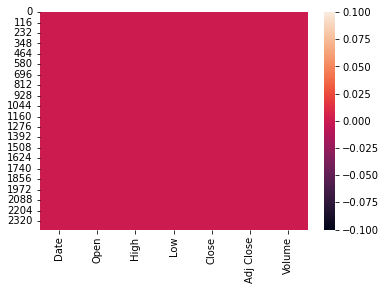

In [12]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

We can clearly visualize that there is no null data present

In [13]:
"""""def augFeatures(df):                       #here creating fnuc with name of augfun with name of df 
    df["Data"] = pd.to_datetime(df["Date"])     #data type of my date column beacuse its object but it sholud be date time so thats why i am converting the data type of my date column from object to date time
    df["year"] = df["Date"].dt.year             #
    df["month"] = df["Date"].dt.month
    df["day"] = df["Date"].dt.dayofweek
    df = df.drop(["Date"], axis=1, inplace=True) #True the changes value will replect in original data
    return df

df_feat=augFeatures(df)
"""""

'""def augFeatures(df):                       #here creating fnuc with name of augfun with name of df \n    df["Data"] = pd.to_datetime(df["Date"])     #data type of my date column beacuse its object but it sholud be date time so thats why i am converting the data type of my date column from object to date time\n    df["year"] = df["Date"].dt.year             #\n    df["month"] = df["Date"].dt.month\n    df["day"] = df["Date"].dt.dayofweek\n    df = df.drop(["Date"], axis=1, inplace=True) #True the changes value will replect in original data\n    return df\n\ndf_feat=augFeatures(df)\n'

In [14]:
#Converting the datatype of the Date column from object to datetime-/ as it from DF

df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [15]:
#Setting Date as Dataframe Index
#df.set_index is used to set the Datframe Index using existing columns my existing column is Date
df.set_index('Date', inplace=True)


The set_index() function is used to set the DataFrame Index using existing columns

the above program is used to replace the index columns in that place data column is used

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [17]:
#Checking number of unique value in each column
#see adj & close columns are same value
df.nunique().to_frame("No of Unique values")

,No of Unique values
Open,2132
High,2128
Low,2136
Close,2225
Adj Close,2225
Volume,2391


In [18]:
#Checking the value counts of each colum
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

30.000000     6
28.000000     6
28.500000     5
220.000000    5
360.000000    4
             ..
210.050003    1
205.809998    1
226.009995    1
230.300003    1
673.690002    1
Name: Open, Length: 2132, dtype: int64


34.500000     7
28.000000     7
30.000000     7
27.000000     6
34.799999     5
             ..
225.490005    1
206.789993    1
209.880005    1
205.000000    1
786.140015    1
Name: High, Length: 2128, dtype: int64


27.299999     6
28.000000     6
203.000000    5
27.900000     4
28.250000     4
             ..
232.429993    1
236.059998    1
244.410004    1
249.449997    1
673.520020    1
Name: Low, Length: 2136, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.979996    1
237.789993    1
780.000000    1
Name: Close, Length: 2225, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.

se, we will drop the close columns since they contains same values

In [19]:
#-------column name----axis=1 becuse i will drop the columns name, inplace =True - It replects the value in original data frame
df.drop(["Adj Close"], axis=1, inplace=True)

Cheking the Duplicate value in the DataFrame 


In [21]:
#1st we will check the duplicate value if it is present the data becuse its imp
#Duplicat evalue will affect the performance of the value
print("Total Duplicate Rows are", df.duplicated().sum())

Total Duplicate Rows are 0


# Description of dataset

In [22]:
#Statistical summary of numerical columns
df.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


This gives the statistical information of the numerical columns . The summary of the dataset looks perfect since there is no negative / invalid values present . 

From the above description we can observe the following : 

The counts of all the columns are same which means there are no missing values in the dataset . 

The median ( 50 % ) value is greater than the mean in Open , High , Low , Close columns which means the data is skewed to left in these column . 

By summarizing the data we can observe there is a huge differences between 75 % and max hence there are outliers present int he data .

We can also notice the Standard deviation , minimum value , 25 % percentile values from this describe method .

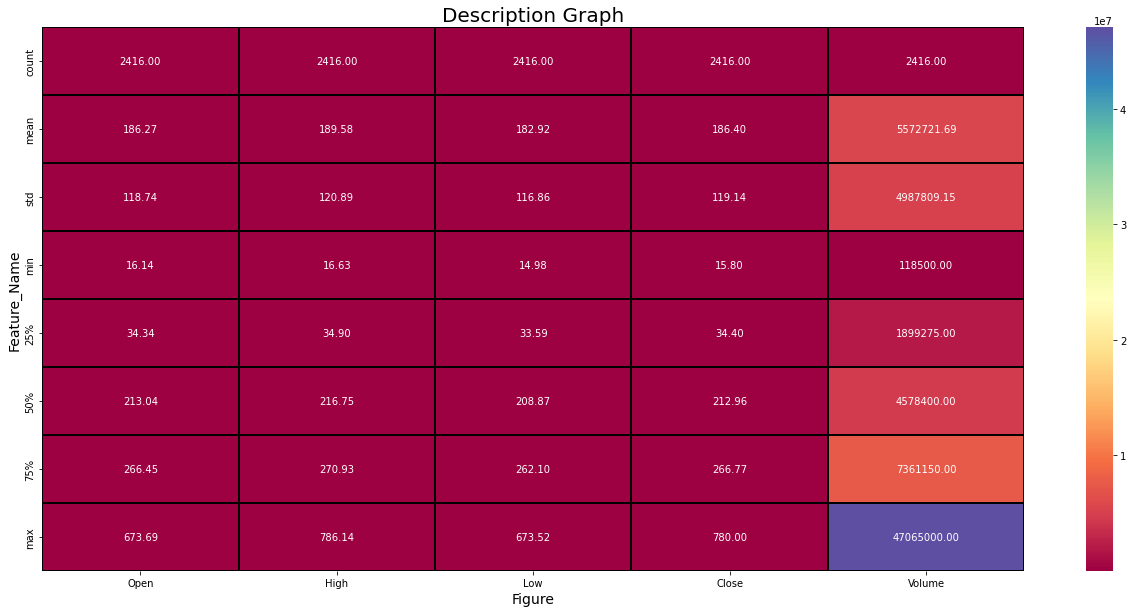

In [23]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, fmt='0.2f', linewidth=0.2, linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature_Name', fontsize=14)
plt.title('Description Graph', fontsize=20)
plt.show()

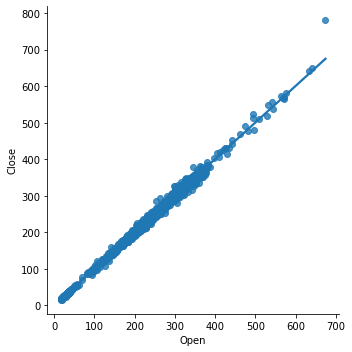

In [24]:
#Seborn
sns.lmplot(x='Open', y='Close', data=df, palette='colorblind')

Open has a positive correlation with close

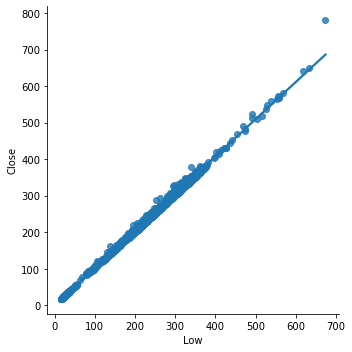

In [25]:
sns.lmplot(x='Low', y='Close', data=df, palette='colorblind')

Low has a positive correlation with close

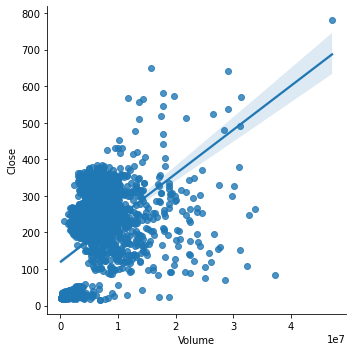

In [26]:
sns.lmplot(x='Volume', y='Close', data=df, palette='colorblind')

Volume has a positive correlation with close , Not a strong correlation

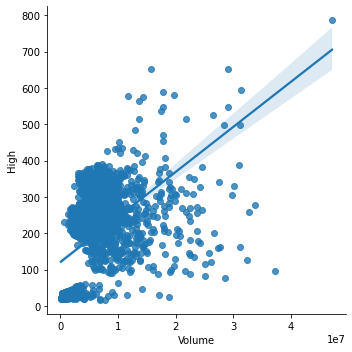

In [27]:
sns.lmplot(x='Volume', y='High', data=df, palette='colorblind')

volume has positive correlation not a strong correlation

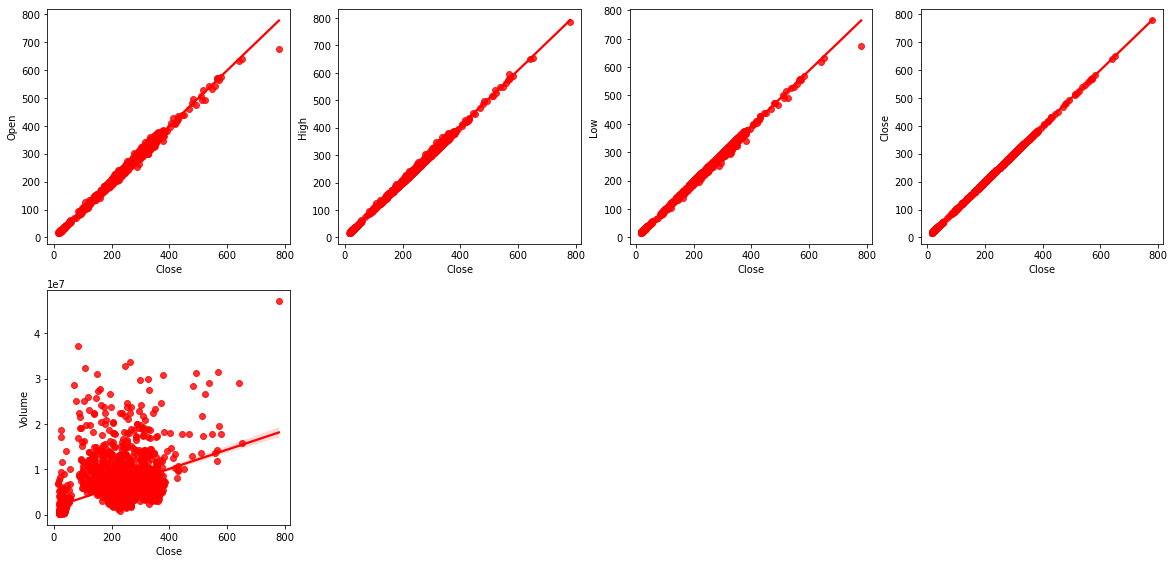

In [28]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='Close', y=i, data=df, color='r')
        plt.xlabel("Close")
        plt.ylabel(i)
    p+=1
    
plt.show()

From this figure we can identify that all the features except volume a high positive linear relationship with the target variables

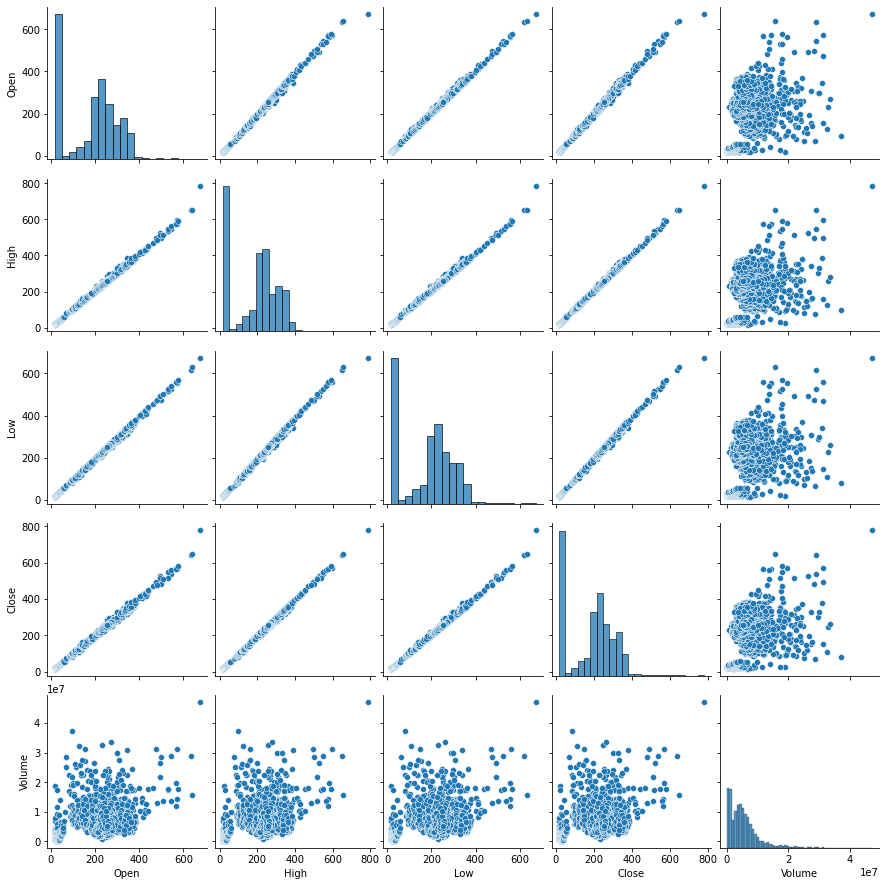

In [29]:
sns.pairplot(data=df, palette ='Dark2')
#for multivariate analysis here using pairplot

The pairplot gives the pairpwise relation between the feature. on the diagonal we can notice the distribution plots

The features Low, High and open have strong linear relation with each others

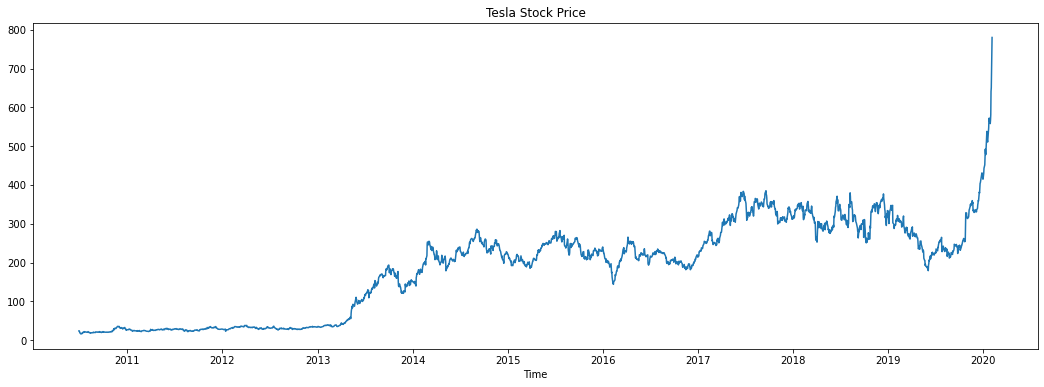

In [30]:
plt.figure(figsize = (18, 6))
plt.plot(df.Close, label = 'closing price')
plt.xlabel("Time")
plt.title("Tesla Stock Price")
plt.show()

Text(0.5, 1.0, 'The General Trend of all values')

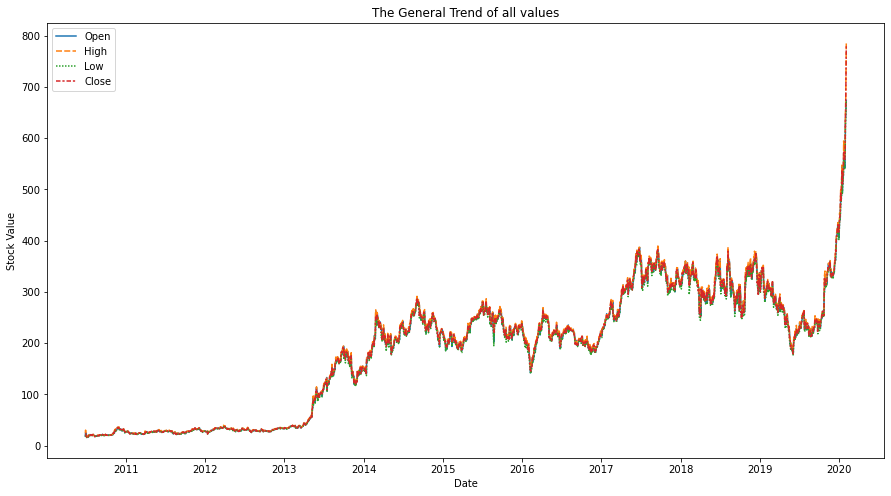

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel("Stock Value")
plt.title("The General Trend of all values")

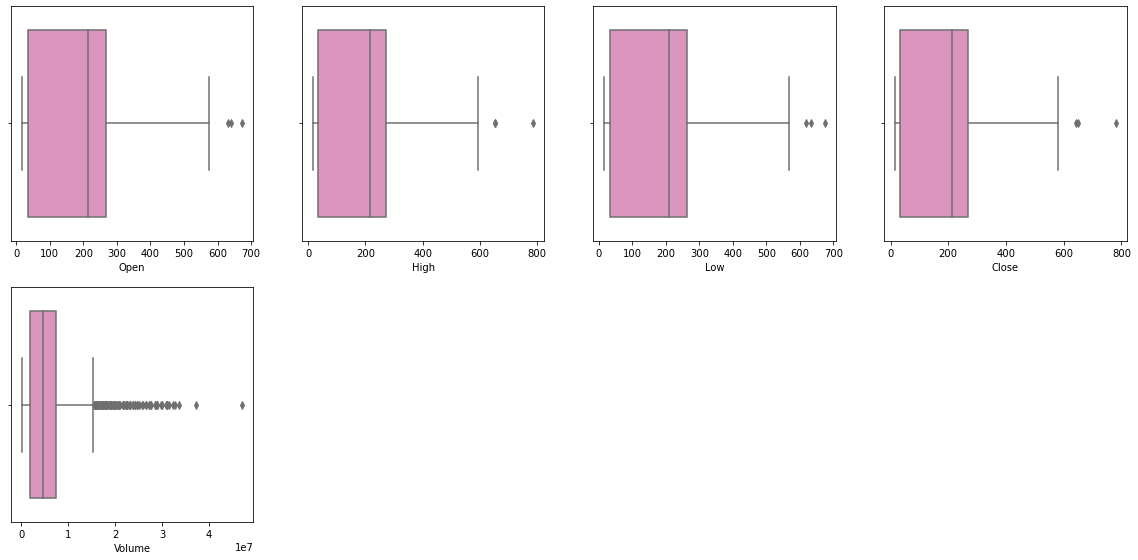

In [32]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize=(20,25))
p=1
for i in df:  #i am using for loop for itreating  over the columns of my data frame
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = "Set2_r")
        plt.xlabel(i)
    p+=1

plt.show()

We do not remove the outliers from the target variable and from the 
so we have found outliers in all columns

So, removing the outliers using the ascore and IQR technique before the model and selected best one.

In [33]:
from scipy.stats import zscore
out_features=df[['Open','High','Low','Volume']]
z=np.abs(zscore(out_features)) #out_features are the above four columns O, H, L, V
z

,Open,High,Low,Volume
Date,,,,
2010-06-29,1.409007,1.361644,1.415491,2.645713
2010-06-30,1.351812,1.316801,1.366190,2.329035
2010-07-01,1.358466,1.354032,1.392124,0.530619
2010-07-02,1.375313,1.377364,1.405477,0.086814
2010-07-06,1.400584,1.403012,1.430127,0.259522
...,...,...,...,...
2020-01-28,3.219618,3.203776,3.211097,1.246452
2020-01-29,3.280267,3.311249,3.291125,2.452241
2020-01-30,3.758132,3.816597,3.723964,4.699023


In [34]:
#Threshold=3
np.where(z>3)
#we can check where this condition match

(array([ 720,  721,  722,  723,  725,  733,  766,  767,  783,  795,  821,
         822,  845,  846,  847,  848,  854,  864,  892,  920,  921, 1506,
        1950, 2002, 2038, 2041, 2042, 2063, 2078, 2079, 2097, 2098, 2154,
        2182, 2206, 2220, 2221, 2226, 2240, 2283, 2347, 2348, 2398, 2399,
        2401, 2402, 2402, 2404, 2407, 2407, 2407, 2407, 2408, 2408, 2408,
        2409, 2409, 2409, 2410, 2410, 2411, 2411, 2411, 2412, 2412, 2412,
        2413, 2413, 2413, 2413, 2414, 2414, 2414, 2415, 2415, 2415, 2415],
       dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 0, 3, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3], dtype=int64))

In [35]:
z.iloc[723,3]

6.3349894289721185

In [36]:
#Now removing the data above Zscore and creating new DF
#removing the index value and making the new df
df1 = df[(z<3).all(axis=1)]

df1.shape

(2360, 5)

In [37]:
#shape of old and new dataframe
print("Old Data Frame-", df.shape[0])
print("New Data Frame-", df1.shape[0])

Old Data Frame- 2416
New Data Frame- 2360


In [38]:
print("Data Loss Percentage- ", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  2.3178807947019866


#data lose should be less than 10%- its more than 10% means we are loosing the data

or method for percentage calculation purposes

In [39]:
df=df1

It is affordable loss of data now we will check with IQR Method

In [40]:
#1st Quantile
Q1=out_features.quantile(0.25)

#3rd quantile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3 - Q1

df2=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
df2.shape

(2303, 5)

In [42]:
print("Data Loss Percentage After removing the  outliers with IQR method", ((df.shape[0]-df2.shape[0])/df.shape[0])*100) 

Data Loss Percentage After removing the  outliers with IQR method 2.415254237288136


# Checking How the data has been distributed in each column

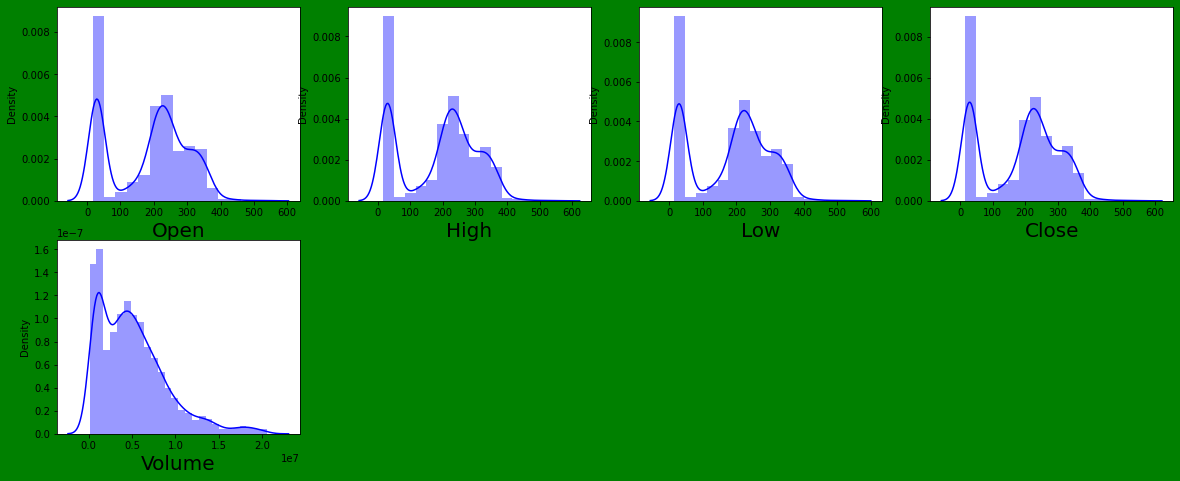

In [43]:
#distirbution plot
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color= 'b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

from the above distribution plots we can notice that the data almost looks normal in all the columns except volume

#checking the skewness

In [44]:
df.skew()


Open     -0.166733
High     -0.168561
Low      -0.163947
Close    -0.165594
Volume    1.177040
dtype: float64

in the above skewness the volume not in the range

In [45]:
#Removing the skewness using the cuberoot method
df['Volume']= np.cbrt(df['Volume'])

we have removed the skewness using the cube root method 

In [46]:
df.skew()

Open     -0.166733
High     -0.168561
Low      -0.163947
Close    -0.165594
Volume   -0.049348
dtype: float64

we can see the skewness has been reduced in volume column

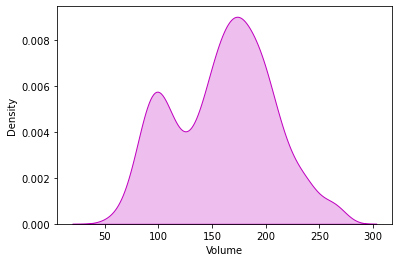

In [47]:
#Lets vissualize how thw data has been ditrsibuted in volume after remoing skewness

sns.distplot(df['Volume'], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

this looks alomost normal and skewness is alos removed

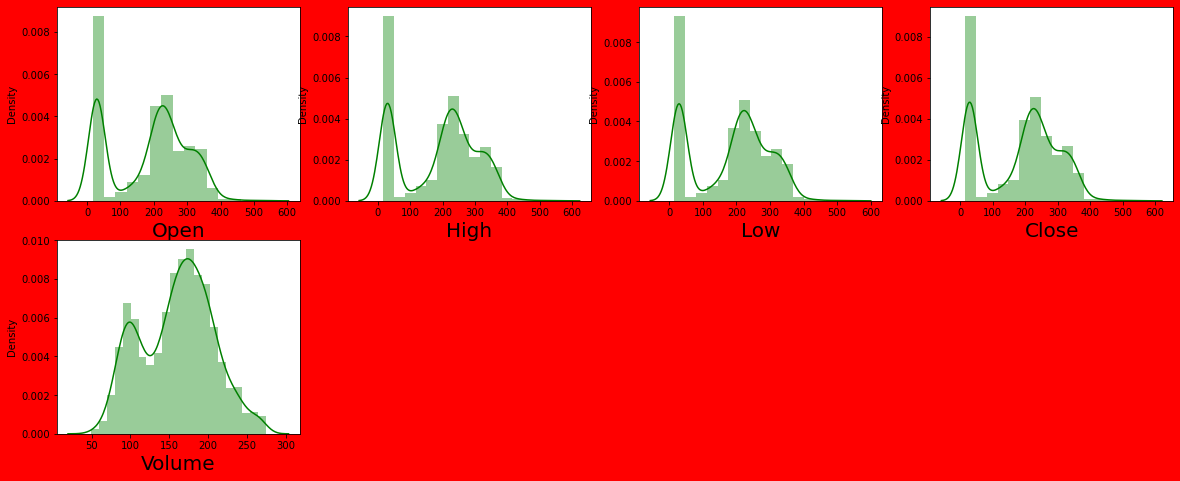

In [48]:
#Let us visualize again
plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color= 'green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [49]:
#Correlation between target variable and independent variables

In [50]:
#Now we will check the corelation between feature using corr()
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999636,0.999586,0.999110,0.691035
High,0.999636,1.000000,0.999573,0.999648,0.696482
Low,0.999586,0.999573,1.000000,0.999629,0.684846
Close,0.999110,0.999648,0.999629,1.000000,0.690879
Volume,0.691035,0.696482,0.684846,0.690879,1.000000


This gives the correlation between the dependent and independent variables, we can visualize this by plotting heatmap

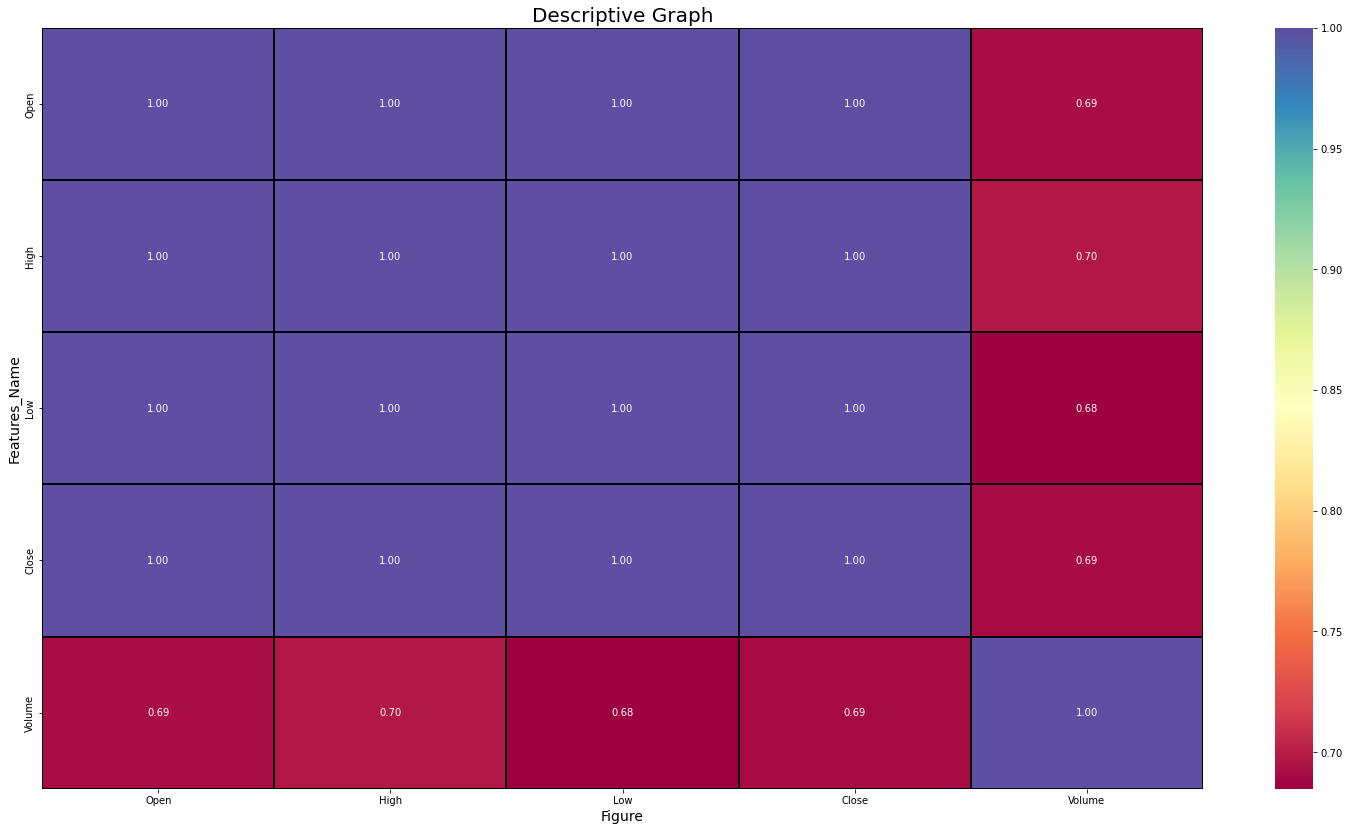

In [51]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

In [52]:
df.corr().Close.sort_values()

Volume    0.690879
Open      0.999110
Low       0.999629
High      0.999648
Close     1.000000
Name: Close, dtype: float64

We can observe the positive correlated features with the target.

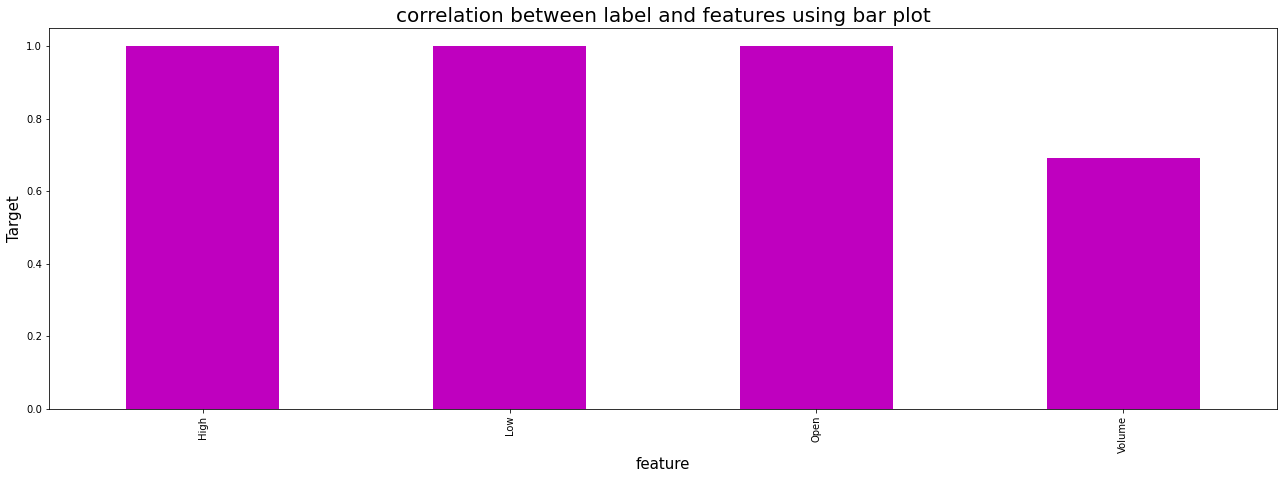

In [53]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
df.corr()['Close'].sort_values(ascending = False).drop(['Close']).plot(kind='bar',color="m")
plt.xlabel('feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('correlation between label and features using bar plot', fontsize=20)
plt.show()

From the above bar plotwe van notice the positive corelation between the fatures and the target, Here the volume features has less correlation with the target column

In [54]:
#Separating the independent and target variables into x and y

x = df1.drop("Close", axis=1)
y = df1["Close"]

print("Feature Dimention =", x.shape)
print("Label Dimention", y.shape)

Feature Dimention = (2360, 4)
Label Dimention (2360,)


In [55]:
#feature scaling using standard Scalarization

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Open,High,Low,Volume
0,-1.420294,-1.374432,-1.427526,2.286419
1,-1.361700,-1.328357,-1.377020,2.120674
2,-1.368517,-1.366611,-1.403588,0.905467
3,-1.385776,-1.390584,-1.417267,0.274109
4,-1.411664,-1.416937,-1.442520,0.652018
...,...,...,...,...
2355,2.397372,2.422375,2.393889,2.194817
2356,2.573326,2.535524,2.572237,1.620021
2357,2.987281,2.985228,2.950064,2.140248
2358,2.796138,2.796760,2.830552,1.705938


We have scaled the data using Standard scalarization metjod to overcome the issue of biasness

#Checking Variance inflation Factor(VIF)

In [57]:
#Finding variance inflation factor in each scaled column i.e X.shape[1] (1/(1-R2))
#1st import library
#vif-x.values an the independent  variable
#for i the range -using range function itrates over the columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1781.725322,Open
1,2279.581318,High
2,1992.663985,Low
3,2.745962,Volume


In [58]:
#x.drop("High", axis=1, inplace = Ture)

In [59]:
#Agin checking the VIF value to confirm whether the Multicollinearity still exists or noyt

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1781.725322,Open
1,2279.581318,High
2,1992.663985,Low
3,2.745962,Volume


# Modelling 

# Finding the best Random State

In [60]:
#Importing necessory libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Creating train test Split

In [61]:
#Finding the best Random State
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuaracy is ", maxAccu, "at random_state", maxRS)
    

Best accuaracy is  0.9997657983118071 at random_state 139


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [64]:
#Checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_LR))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_Score: 0.9997657983118071
R2_Score on training data: 99.96885789174415
Mean Absolute error:- 1.2351269522234936
Mean Squared Error:- 3.2404593774054553
Root Mean Squared Error:- 1.8001276003121154


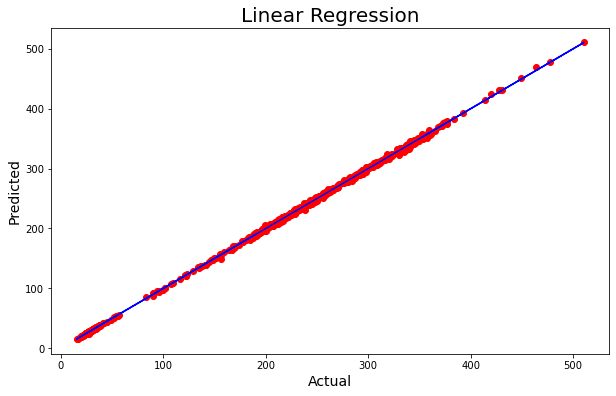

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR, y=y_test, color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression', fontsize=20)
plt.show()

In [67]:

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_RFR))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_Score: 0.9993039007204008
R2_Score on training data: 99.99084892861698
Mean Absolute error:- 1.8265389104802219
Mean Squared Error:- 9.631362846217016
Root Mean Squared Error:- 3.1034437075959693


In [68]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_knn))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_Score: 0.9980863399942105
R2_Score on training data: 99.86966994069122
Mean Absolute error:- 3.1268451632768364
Mean Squared Error:- 26.47776606041334
Root Mean Squared Error:- 5.145655066210068


In [ ]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_knn))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))

#It is mandatory to chek all the performance model to all the model

In [69]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_GBR))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_Score: 0.9992188936597388
R2_Score on training data: 99.97211182442103
Mean Absolute error:- 1.9572754387113045
Mean Squared Error:- 10.80753680547863
Root Mean Squared Error:- 3.287481833482678


In [70]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_Score: 0.9991159078008095
R2_Score on training data: 99.91552633962546
Mean Absolute error:- 2.5509924657199203
Mean Squared Error:- 12.23246885819964
Root Mean Squared Error:- 3.4974946544919323


In [76]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_Ridge = rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_Ridge))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_Ridge))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_Ridge))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_Ridge)))

R2_Score: 0.9995320009696452
R2_Score on training data: 99.94929572229825
Mean Absolute error:- 1.6834862779095747
Mean Squared Error:- 6.4753241457445325
Root Mean Squared Error:- 2.544665822017605


In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor ()
dtr.fit(x_train, y_train)
pred_DTR = dtr.predict(x_test)
pred_train= dtr.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_dtr))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_DTR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2_Score: 0.998904646542736
R2_Score on training data: 100.0
Mean Absolute error:- 2.4218788347457627
Mean Squared Error:- 16.477243547088534
Root Mean Squared Error:- 4.0592171101197


In [77]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
pred_SVR = svr.predict(x_test)
pred_train= svr.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_SVR))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_SVR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_SVR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_SVR)))

R2_Score: 0.951902353982245
R2_Score on training data: 97.10104695494026
Mean Absolute error:- 9.949096433738005
Mean Squared Error:- 665.4882348284701
Root Mean Squared Error:- 25.797058646839375


In [79]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR = etr.predict(x_test)
pred_train= etr.predict(x_train)
print('R2_Score:',r2_score(y_test,pred_ETR))
print('R2_Score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute error:-', mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_ETR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_Score: 0.9994648184725895
R2_Score on training data: 99.99999999995583
Mean Absolute error:- 1.746802398700566
Mean Squared Error:- 7.404874031834509
Root Mean Squared Error:- 2.7211898191479604


In [80]:
from sklearn.model_selection import cross_val_score

In [83]:
#checking cv score for Rabdomforest clasifier
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_LR) - score.mean())*100)

[0.99303154 0.9996625  0.99369573 0.99880959 0.99686683]
0.9964132385330842
Difference between R2 score and cross validation score is- 0.3352559778722952


In [84]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_RFR) - score.mean())*100)

[0.59537828 0.9694085  0.98927217 0.99741869 0.91924933]
0.8941453934552259
Difference between R2 score and cross validation score is- 10.515850726517485


In [85]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_knn) - score.mean())*100)

[-0.99585327  0.95590816  0.96354932  0.99251573  0.89661013]
0.5625460152464667
Difference between R2 score and cross validation score is- 43.60379093178871


In [86]:
score = cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_GBR) - score.mean())*100)

[0.42441929 0.97254106 0.98822911 0.99698157 0.91769218]
0.8599726417797562
Difference between R2 score and cross validation score is- 13.924625187998263


In [87]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_lasso) - score.mean())*100)

[0.73431494 0.99896578 0.98437577 0.99559537 0.9898096 ]
0.9406122909950199
Difference between R2 score and cross validation score is- 5.850361680578963


In [88]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_rd) - score.mean())*100)

[0.99065119 0.99949903 0.99174831 0.99772061 0.9942011 ]
0.9947640472915877
Difference between R2 score and cross validation score is- 0.47679536780574905


In [89]:
score = cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_dtr) - score.mean())*100)

[0.62405708 0.96522035 0.98026679 0.99500961 0.91728713]
0.896368192366942
Difference between R2 score and cross validation score is- 10.253645417579405


In [91]:
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_SVR) - score.mean())*100)

[-31.58070871   0.9258226    0.97203527   0.87684117   0.14838183]
-5.7315255678713335
Difference between R2 score and cross validation score is- 668.3427921853579


In [92]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-", (r2_score(y_test,pred_ETR) - score.mean())*100)

[0.62321445 0.9968649  0.99127586 0.99781508 0.9202521 ]
0.9058844782140136
Difference between R2 score and cross validation score is- 9.358034025857586


In [93]:
from sklearn.model_selection import GridSearchCV

In [96]:
param={'alpha':[1.0,.05,.4,2], 'fit_intercept':[True, False],
      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'saga', 'lbfgs'],
      'positive':[False, True],
      'random_state':[1,4,10,20]
      
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga',
                                    'lbfgs']})

In [97]:
gscv.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [98]:
model=Ridge(alpha= 0.05, fit_intercept=True, positive=False, random_state= 1, solver='auto')

In [99]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('Mean Absolute error:-', mean_absolute_error(y_test, pred))
print('Mean Squared Error:-', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 0.999760050881563
Mean Absolute error:- 1.2555513538481324
Mean Squared Error:- 3.319981922158769
Root Mean Squared Error:- 1.8220817550699444


In [100]:
#use this model to save this model
import joblib
#jonlib.dump(model,'Teslastock.pkl')

In [101]:
import pickle
filename="TeslaStock.pkl"
pickle.dump(model, open(filename, 'wb')) #saved model wb-write permistion

In [105]:
import pickle
loaded_model=pickle.load(open('TeslaStock.pkl','rb')) #read permission
result=loaded_model.score(x_test, y_test)
print(result*100)

99.9760050881563


In [108]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
Predicted,191.173700,22.675786,20.702419,243.258274,199.359333,27.927649,214.843125,312.556608,25.976907,29.272716,...,32.367191,34.972063,211.966231,31.501315,107.852448,286.133544,33.164627,31.90866,225.120656,352.788975
Original,190.619995,21.950001,20.459999,244.789993,197.580002,28.049999,212.940002,312.209991,25.830000,28.940001,...,32.700001,34.830002,213.699997,31.490000,107.360001,287.589996,33.220001,32.27000,223.610001,352.049988
